# <center> 数据科学 实验二
何尉宁 2021213599 2021219106班

## 任务列表
**必做：**\
复现课件中线性SVM、决策树、朴素贝叶斯分类的示例，并相对课件代码作出如下作图修改
- [设定支持向量分类器的惩罚为0.05](#one1)
- [对朴素贝叶斯分类器的先验概率进行设定（可随机设定）](#one1)
- [在每张结果图上展示图例](#one3)
- [修改散点颜色为黄和绿](#one3)
  
_测试结果的正确率保留三位小数展示_

**选做：**\
自主选取其他的数据集，采用上述三类分类器进行分类，展示分类结果\
探究分类器的参数对于分类结果的影响并进行文字分析（选做）\
如：
- [DecisionTreeClassifier(max_depth=5)中max_depth设置对于结果的影响（如过拟合或者欠拟合）](#two1)
- [朴素贝叶斯分类器的先验概率修改对于分类的影响](#two2)
- [支持向量分类器不同核函数对于结果的影响](#two3)

_参数不限制于课件中代码所用到的参数，可以探究其他的参数_\
_其他分类方法的效果的对比分析（K近邻，随机森林等）_


<h2>1. 代码复现</h2>

#### 1.1 环境引入

In [2]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons,make_circles,make_classification
%matplotlib inline

#### 1.2 模型引入

1. Support Vector Machine
2. DecisionTree Classifier
3. Naive Bayes (class prior: Gaussian Distribution)

In [3]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

<h4 id = "one1">1.3 修改惩罚系数与先验概率</h4>

1. Set the penalty to 0.5
2. Set the class prior to a random number

In [4]:
names = ["Linear_SVM","Decision_Tree","Naive_Bayes"]
# 设置随机数用于先验概率
random_number = np.random.randint(0,100)
random_number /= 100
print(random_number)

classifiers = [
    SVC(kernel = "linear", C = 0.05),
    DecisionTreeClassifier(random_state = 44, max_depth = 5),
    GaussianNB(priors=[random_number, 1-random_number]),
]

0.27


#### 1.4 引入不同噪声

1. RandomNoise
2. GaussianNoise

In [5]:
X,y=make_classification(n_features=2,n_redundant=0,n_informative=2,
                        random_state=1,n_clusters_per_class=1)

random_num = np.random.RandomState(5) # 设置一个伪随机数种子
# 随机扰动噪声
RandomNoise = random_num.uniform(low = -1, high = 1, size = X.shape)
# 高斯噪声
GaussianNoise = random_num.normal(loc = 0, scale = 1, size = X.shape)

# X += 2*RandomNoise
X += 2*GaussianNoise

linearly_separable=(X,y) # 将上述得到的x，y够作为一个线性可分的数据集

datasets=[make_moons(noise=0.1,random_state=np.random.RandomState(5)),
         make_circles(noise=0.1,factor=0.5,random_state=1),
         linearly_separable
         ]

<h4 id = "one3"> 1.5 绘图 </h4>

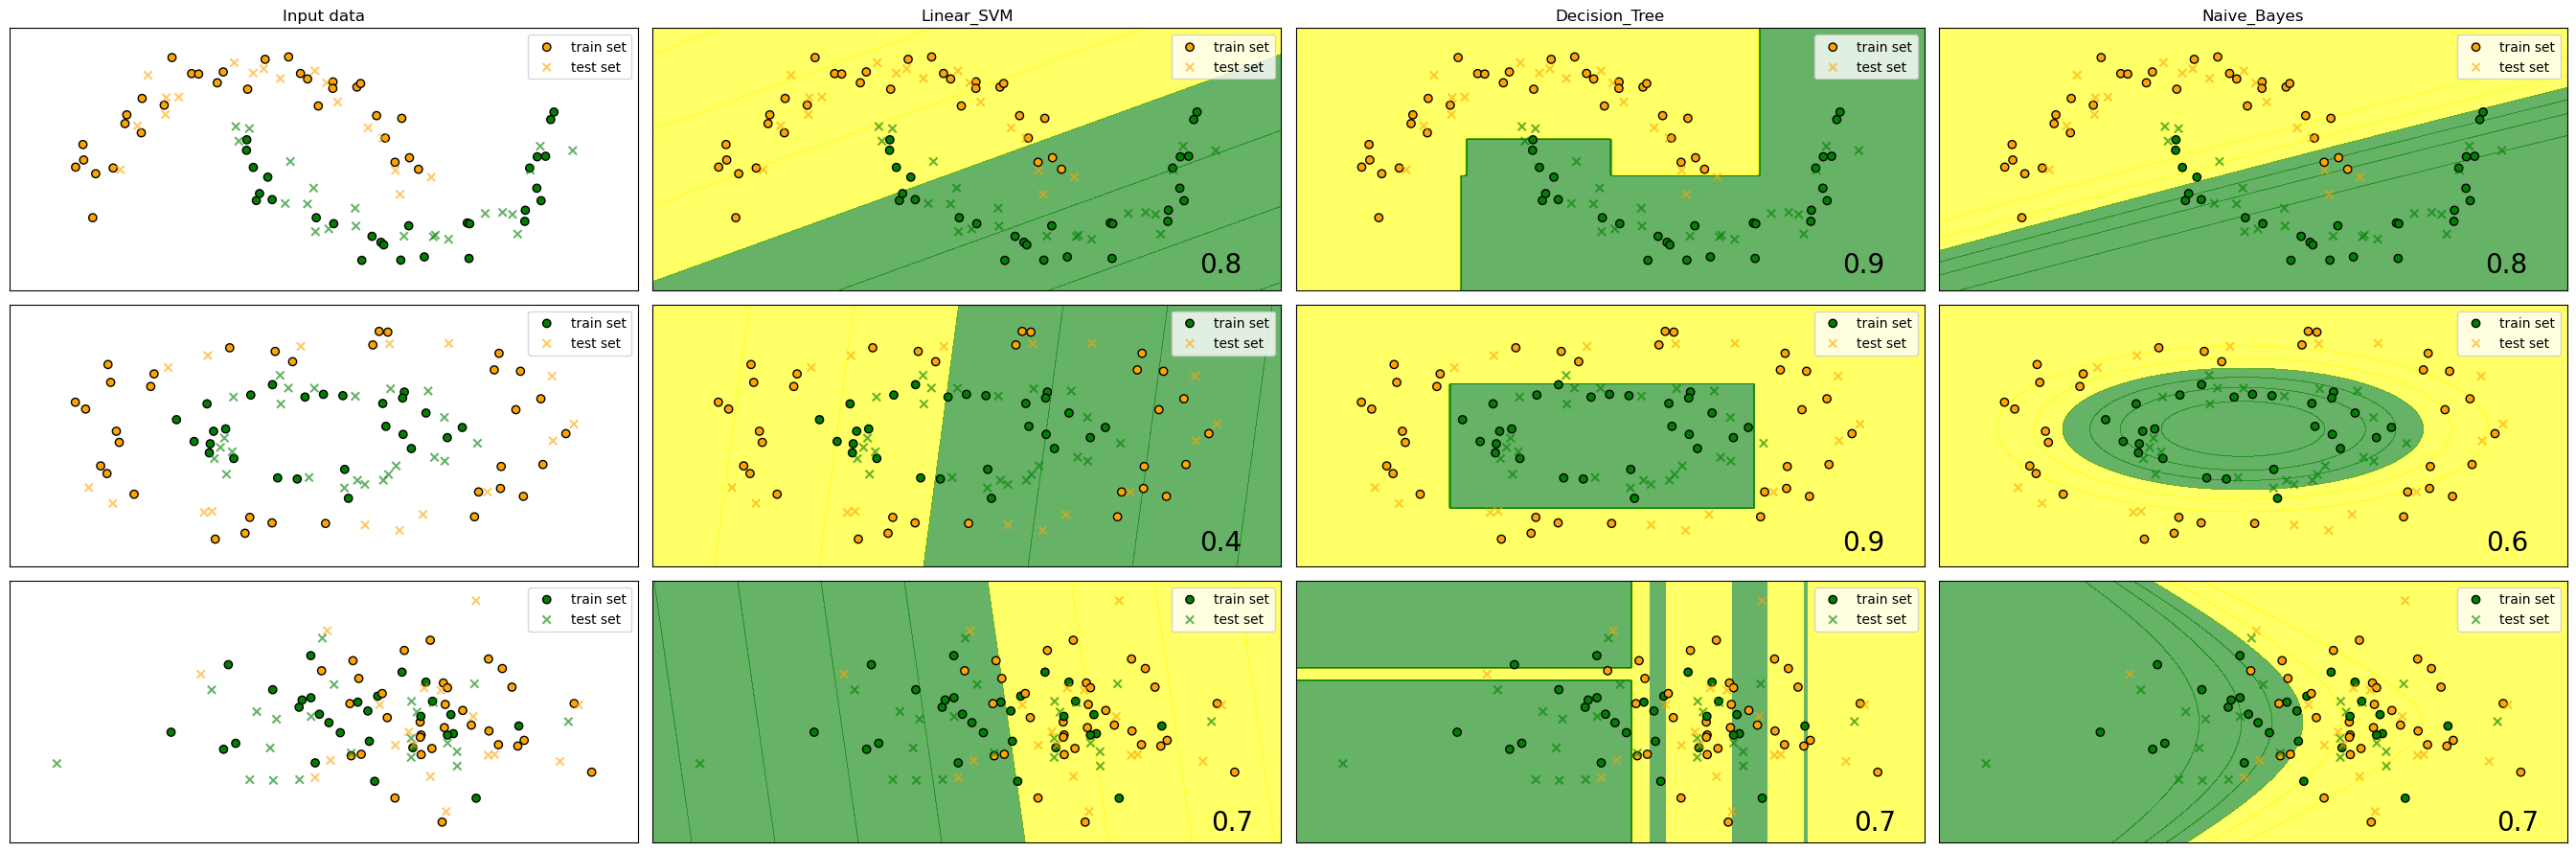

In [5]:
figure = plt.figure(figsize=(27, 9))
i = 1

for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.4, random_state=42)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    cm = ListedColormap((['yellow', 'green']))
    cm_bright = ListedColormap(['#FFA500', '#008000'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i) 

    if ds_cnt == 0:
        ax.set_title("Input data")
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k', marker='o', label='train set')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               facecolor='k', marker='x', label='test set')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    plt.legend()
    i += 1

    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.6)
        
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                    edgecolors='k', marker='o', label='train set')
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
                    facecolor='k', marker='x', label='test set')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.legend()
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - 0.3, yy.min() + 0.3, ('%.1f' % score),
                size=20, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

## 2. 选做


#### 2.1 数据集介绍
#### Wine
> Donated on 6/30/1991\
> Using chemical analysis to determine the origin of wines

**Dataset Characteristics**
Tabular\
**Subject Area**
Physics and Chemistry\
**Associated Tasks**
Classification\
**Feature Type**
Integer, Real\
**Instances**
178\
**Features**
13

In [6]:
file_path = './wine'
wine_data = np.loadtxt(file_path + "/wine.data", delimiter=",")
# wine_names = np.loadtxt(file_path + "/wine.names", dtype=str)
print(wine_data.shape)

(178, 14)


#### 2.2 数据处理

In [8]:
# 读成DataFrame
wine_data = pd.DataFrame(wine_data)
wine_data.columns = ["Class","Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols",
                     "Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue",
                     "OD280/OD315 of diluted wines","Proline"]
wine_data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [10]:
# 标准化数据
wine_data.iloc[:,1:] = StandardScaler().fit_transform(wine_data.iloc[:,1:])
wine_data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,1.0,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,1.0,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.0,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,1.0,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


#### 2.3 使用不同分类算法处理

In [9]:
names = ["Linear_SVM","Decision_Tree","Naive_Bayes"]

random_number = np.random.randint(0,100)
random_number /= 100
print(random_number)

classifiers = [
    SVC(kernel = "linear", C = 0.05),
    DecisionTreeClassifier(random_state = 44, max_depth = 5),
    GaussianNB(priors=[random_number, 1-random_number]),
]

0.15


<h5 id = "two3"> 2.3.1 SVC </h5>

1. 使用"Linear"核函数

SVC score:  0.9722222222222222


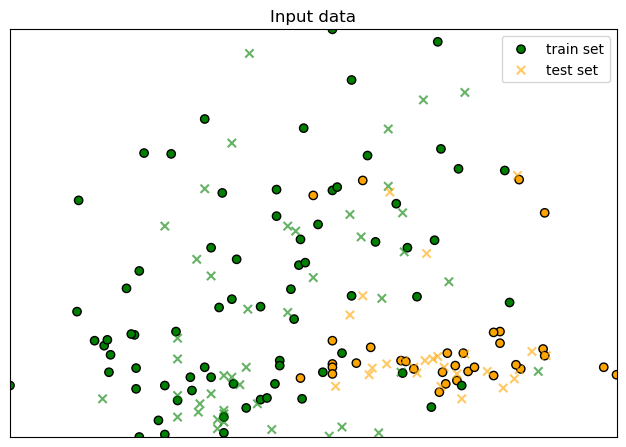

In [30]:
# 使用SVC进行分类
X = wine_data.iloc[:,1:]
y = wine_data.iloc[:,0]
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.4, random_state=42)
clf = SVC(kernel = "linear", C = 0.05)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("SVC score: ", score)

figure = plt.figure(figsize=(36, 18))
i = 1
x_min, x_max = X_train.iloc[:,0].min() - 0.5, X_train.iloc[:,0].max() + 0.5
y_min, y_max = X_train.iloc[:,1].min() - 0.5, X_train.iloc[:,1].max() + 0.5
h = 0.02
xx, yy = np.meshgrid(
    np.linspace(X_train.iloc[:,0].min(), X_train.iloc[:,0].max(), 100),
    np.linspace(X_train.iloc[:,1].min(), X_train.iloc[:,1].max(), 100)
)
cm = ListedColormap((['yellow', 'green']))
cm_bright = ListedColormap(['#FFA500', '#008000'])

ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
ax.set_title("Input data")
ax.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_train, cmap=cm_bright,
           edgecolors='k', marker='o', label='train set')
ax.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=y_test, cmap=cm_bright, alpha=0.6,
           facecolor='k', marker='x', label='test set')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
plt.legend()

2. 使用多项式核函数

**需要修改惩罚系数，否则准确率会大幅下降，非常欠拟合**

SVC score:  0.9027777777777778


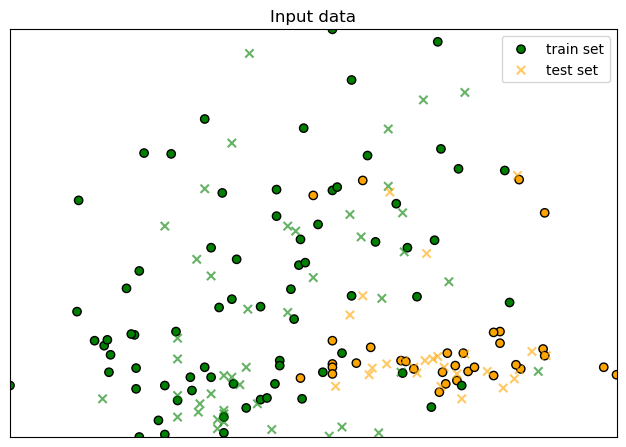

In [34]:
# 使用SVC进行分类
X = wine_data.iloc[:,1:]
y = wine_data.iloc[:,0]
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.4, random_state=42)
clf = SVC(kernel = "poly", C = 1)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("SVC score: ", score)

figure = plt.figure(figsize=(36, 18))
i = 1
x_min, x_max = X_train.iloc[:,0].min() - 0.5, X_train.iloc[:,0].max() + 0.5
y_min, y_max = X_train.iloc[:,1].min() - 0.5, X_train.iloc[:,1].max() + 0.5
h = 0.02
xx, yy = np.meshgrid(
    np.linspace(X_train.iloc[:,0].min(), X_train.iloc[:,0].max(), 100),
    np.linspace(X_train.iloc[:,1].min(), X_train.iloc[:,1].max(), 100)
)
cm = ListedColormap((['yellow', 'green']))
cm_bright = ListedColormap(['#FFA500', '#008000'])

ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
ax.set_title("Input data")
ax.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_train, cmap=cm_bright,
           edgecolors='k', marker='o', label='train set')
ax.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=y_test, cmap=cm_bright, alpha=0.6,
           facecolor='k', marker='x', label='test set')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
plt.legend()

<h5 id = "two1"> 2.3.2 决策树 </h5>

使用不同深度

Decision Tree score:  0.9444444444444444


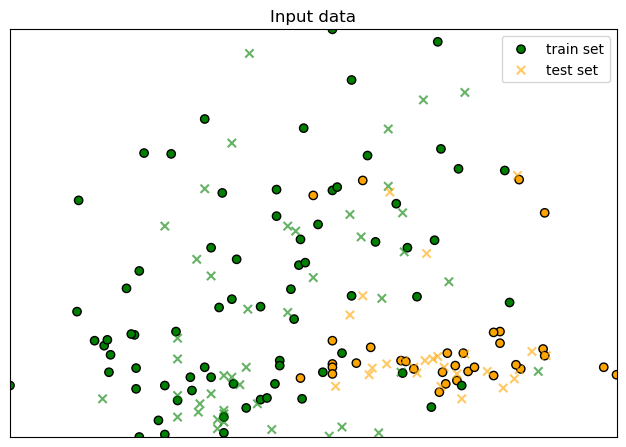

In [35]:
# 使用决策树进行分类
X = wine_data.iloc[:,1:]
y = wine_data.iloc[:,0]
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.4, random_state=42)
clf = DecisionTreeClassifier(random_state = 44, max_depth = 5)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("Decision Tree score: ", score)

figure = plt.figure(figsize=(36, 18))
i = 1
x_min, x_max = X_train.iloc[:,0].min() - 0.5, X_train.iloc[:,0].max() + 0.5
y_min, y_max = X_train.iloc[:,1].min() - 0.5, X_train.iloc[:,1].max() + 0.5
h = 0.02
xx, yy = np.meshgrid(
    np.linspace(X_train.iloc[:,0].min(), X_train.iloc[:,0].max(), 100),
    np.linspace(X_train.iloc[:,1].min(), X_train.iloc[:,1].max(), 100)
)
cm = ListedColormap((['yellow', 'green']))
cm_bright = ListedColormap(['#FFA500', '#008000'])

ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
ax.set_title("Input data")
ax.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_train, cmap=cm_bright,
           edgecolors='k', marker='o', label='train set')
ax.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=y_test, cmap=cm_bright, alpha=0.6,
           facecolor='k', marker='x', label='test set')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
plt.legend()

Decision Tree score:  0.625


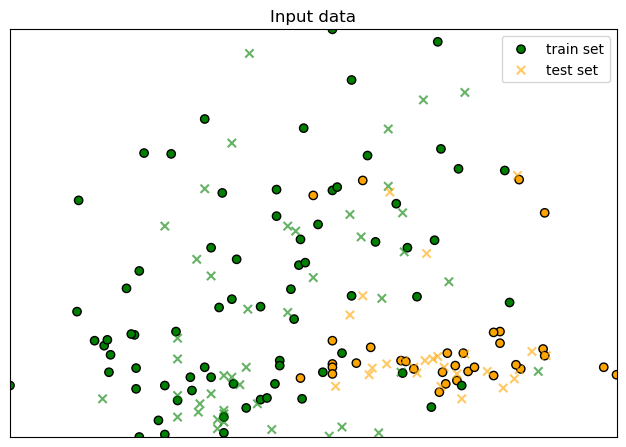

In [37]:
# 使用决策树进行分类
X = wine_data.iloc[:,1:]
y = wine_data.iloc[:,0]
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.4, random_state=42)
clf = DecisionTreeClassifier(random_state = 44, max_depth = 1)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("Decision Tree score: ", score)

figure = plt.figure(figsize=(36, 18))
i = 1
x_min, x_max = X_train.iloc[:,0].min() - 0.5, X_train.iloc[:,0].max() + 0.5
y_min, y_max = X_train.iloc[:,1].min() - 0.5, X_train.iloc[:,1].max() + 0.5
h = 0.02
xx, yy = np.meshgrid(
    np.linspace(X_train.iloc[:,0].min(), X_train.iloc[:,0].max(), 100),
    np.linspace(X_train.iloc[:,1].min(), X_train.iloc[:,1].max(), 100)
)
cm = ListedColormap((['yellow', 'green']))
cm_bright = ListedColormap(['#FFA500', '#008000'])

ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
ax.set_title("Input data")
ax.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_train, cmap=cm_bright,
           edgecolors='k', marker='o', label='train set')
ax.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=y_test, cmap=cm_bright, alpha=0.6,
           facecolor='k', marker='x', label='test set')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
plt.legend()

<h5 id = "two2"> 2.3.3 朴素贝叶斯分类器 </h5>

不同先验概率

Naive Bayes score:  0.7777777777777778


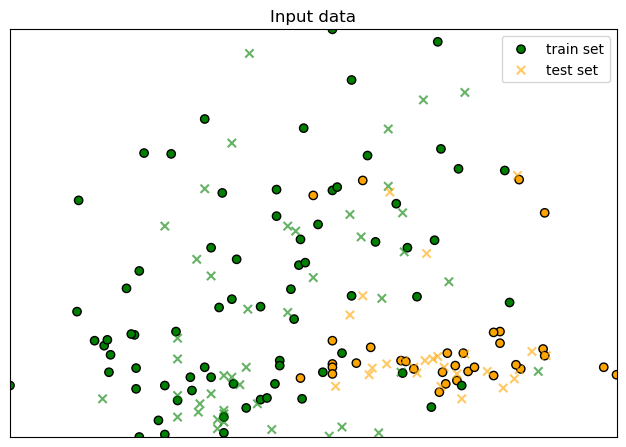

In [58]:
wine = np.loadtxt(file_path + "/wine.data", delimiter=",")
wine = pd.DataFrame(wine)
wine.columns = ["Class","Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols",
                        "Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue",
                        "OD280/OD315 of diluted wines","Proline"]

selected_features = ["Alcohol", "Malic acid"]
wine_subset = wine[["Class"] + selected_features]

X = wine_subset[selected_features]
y = wine_subset["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

clf = GaussianNB()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("Naive Bayes score: ", score)

figure = plt.figure(figsize=(36, 18))
i = 1
x_min, x_max = X_train.iloc[:, 0].min() - 0.5, X_train.iloc[:, 0].max() + 0.5
y_min, y_max = X_train.iloc[:, 1].min() - 0.5, X_train.iloc[:, 1].max() + 0.5
h = 0.02
xx, yy = np.meshgrid(
    np.linspace(X_train.iloc[:, 0].min(), X_train.iloc[:, 0].max(), 100),
    np.linspace(X_train.iloc[:, 1].min(), X_train.iloc[:, 1].max(), 100)
)
cm = ListedColormap((['yellow', 'green']))
cm_bright = ListedColormap(['#FFA500', '#008000'])

ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
ax.set_title("Input data")
ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k', marker='o', label='train set')
ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           facecolor='k', marker='x', label='test set')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
plt.legend()

Naive Bayes score:  0.8194444444444444


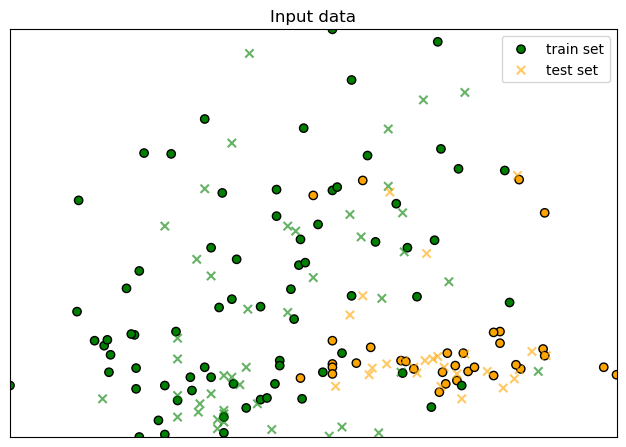

In [62]:
wine = np.loadtxt(file_path + "/wine.data", delimiter=",")
wine = pd.DataFrame(wine)
wine.columns = ["Class","Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols",
                        "Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue",
                        "OD280/OD315 of diluted wines","Proline"]

selected_features = ["Alcohol", "Malic acid"]
wine_subset = wine[["Class"] + selected_features]

X = wine_subset[selected_features]
y = wine_subset["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

clf = GaussianNB(priors=[0.2, 0.3, 0.5])
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("Naive Bayes score: ", score)

figure = plt.figure(figsize=(36, 18))
i = 1
x_min, x_max = X_train.iloc[:, 0].min() - 0.5, X_train.iloc[:, 0].max() + 0.5
y_min, y_max = X_train.iloc[:, 1].min() - 0.5, X_train.iloc[:, 1].max() + 0.5
h = 0.02
xx, yy = np.meshgrid(
    np.linspace(X_train.iloc[:, 0].min(), X_train.iloc[:, 0].max(), 100),
    np.linspace(X_train.iloc[:, 1].min(), X_train.iloc[:, 1].max(), 100)
)
cm = ListedColormap((['yellow', 'green']))
cm_bright = ListedColormap(['#FFA500', '#008000'])

ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
ax.set_title("Input data")
ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k', marker='o', label='train set')
ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           facecolor='k', marker='x', label='test set')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
plt.legend()